In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Overview

In [2]:
df = pd.read_csv("/Users/bagel/Downloads/1-recommendations_merged_100000_samples-train.csv.gz")

df_nontags = df[[c for c in df.columns if not c.startswith("tag_")]]
df_nontags

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id,title,date_release,...,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,description,products,reviews
0,880940,0,0,2022-11-28,True,36.6,13474533,24491295,Pummel Party,2018-09-20,...,Very Positive,89,36370,15.00,0.00,0.0,True,NaN,34,2
1,674020,0,0,2022-04-05,True,41.6,2555866,17916224,World War 3,2022-12-10,...,Mixed,54,49594,0.00,0.00,0.0,True,World War 3 is a Free-to-play tactical online ...,32,6
2,465520,0,0,2018-08-10,True,1.0,10720229,39697203,PRICE,2016-09-15,...,Very Positive,94,4925,0.00,0.00,0.0,True,The hero Ivry wakes up from a nightmare and fi...,102,2
3,108600,0,0,2022-06-20,True,85.2,4077106,1300113,Project Zomboid,2013-11-08,...,Very Positive,94,173263,20.00,0.00,0.0,True,NaN,12,1
4,1824220,0,0,2022-11-25,True,92.5,12491920,4553660,Chivalry 2,2022-06-12,...,Very Positive,82,23960,40.00,0.00,0.0,True,NaN,339,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,1115690,2,0,2020-11-26,True,13.8,11420763,27179933,Yes Your Grace,2020-03-06,...,Very Positive,85,6611,19.99,19.99,0.0,True,"These are troubling times, Your Grace. The pet...",72,7
79996,736220,2,0,2021-06-06,True,30.6,7603580,31996662,Post Scriptum,2018-08-09,...,Very Positive,80,14626,29.99,29.99,0.0,True,"Join the fight for victory in Post Scriptum, t...",50,9
79997,504230,0,0,2021-12-11,True,8.0,13424724,8788957,Celeste,2018-01-25,...,Overwhelmingly Positive,97,72238,20.00,0.00,0.0,True,NaN,268,9
79998,356190,0,0,2022-08-23,True,43.9,3377501,10556348,Middle-earth™: Shadow of War™,2017-10-09,...,Very Positive,88,67261,50.00,0.00,0.0,True,NaN,66,1


In [3]:
df_nontags[['is_recommended']].describe(include=['bool'])

,is_recommended
count,80000
unique,2
top,True
freq,68770


In [4]:
df_nontags['date'] = pd.to_datetime(df_nontags['date'])
df_nontags['date_release'] = pd.to_datetime(df_nontags['date_release'])
df_nontags[['helpful','funny','date','hours']].describe().round(2)

/var/folders/x9/_dr08_1s7bjg3f7n1vlvp4_r0000gn/T/ipykernel_29113/21541341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nontags['date'] = pd.to_datetime(df_nontags['date'])
/var/folders/x9/_dr08_1s7bjg3f7n1vlvp4_r0000gn/T/ipykernel_29113/21541341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nontags['date_release'] = pd.to_datetime(df_nontags['date_release'])


,helpful,funny,date,hours
count,80000.00,80000.00,80000,80000.00
mean,3.32,1.20,2020-02-09 07:55:26.039999744,100.77
min,0.00,0.00,2010-11-19 00:00:00,0.00
25%,0.00,0.00,2018-10-18 00:00:00,7.80
50%,0.00,0.00,2020-10-04 00:00:00,27.40
75%,0.00,0.00,2021-12-05 00:00:00,98.60
max,8297.00,5451.00,2022-12-31 00:00:00,999.90
std,49.11,28.78,NaN,176.55


In [5]:
games = df_nontags[['app_id','title','date_release', 'win', 'mac', 'linux',
       'rating', 'positive_ratio', 'user_reviews', 'price_final',
       'price_original', 'discount']].drop_duplicates()

rating_order = ['Overwhelmingly Negative', 'Very Negative', 'Negative', 'Mostly Negative',
                'Mixed', 
                'Mostly Positive', 'Positive', 'Very Positive', 'Overwhelmingly Positive']

games["rating"] = games.rating.apply(
    lambda x: rating_order.index(x)
)

In [6]:
games.drop(columns='app_id').describe().round(2)

,date_release,rating,positive_ratio,user_reviews,price_final,price_original,discount
count,8572,8572.00,8572.00,8572.00,8572.00,8572.00,8572.00
mean,2017-12-26 14:22:07.111525888,6.13,80.70,9977.79,12.02,11.25,5.36
min,1997-11-14 00:00:00,0.00,8.00,10.00,0.00,0.00,0.00
25%,2015-11-06 00:00:00,5.00,74.00,271.75,1.99,0.99,0.00
50%,2018-05-17 00:00:00,7.00,85.00,1072.50,9.99,9.99,0.00
75%,2020-10-21 00:00:00,7.00,92.00,3787.75,19.99,18.99,0.00
max,2023-08-24 00:00:00,8.00,100.00,7494460.00,149.00,149.00,90.00
std,NaN,1.40,14.57,97151.83,12.42,11.90,18.53


In [7]:
games.drop(columns='app_id').describe(include=['bool'])

,win,mac,linux
count,8572,8572,8572
unique,2,2,2
top,True,False,False
freq,8567,5771,6671


In [8]:
users = df_nontags[['user_id', 'products', 'reviews']].drop_duplicates()
users.drop(columns='user_id').describe().round(2)

,products,reviews
count,78546.00,78546.00
mean,262.69,18.37
std,602.11,69.78
min,0.00,1.00
25%,49.00,2.00
50%,115.00,5.00
75%,263.00,14.00
max,30108.00,6045.00


# Correlation Heatmap of Features

In [9]:
# Drop id columns and text columns
df_nontags.drop(["app_id", "review_id", "user_id", "title", "description"], axis=1, inplace=True)

df_nontags["rating"] = df_nontags.rating.apply(
    lambda x: rating_order.index(x)
)

/var/folders/x9/_dr08_1s7bjg3f7n1vlvp4_r0000gn/T/ipykernel_29113/2458584161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nontags.drop(["app_id", "review_id", "user_id", "title", "description"], axis=1, inplace=True)
/var/folders/x9/_dr08_1s7bjg3f7n1vlvp4_r0000gn/T/ipykernel_29113/2458584161.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nontags["rating"] = df_nontags.rating.apply(


In [10]:
corr_matrix = df_nontags.corr()
corr_matrix

,helpful,funny,date,is_recommended,hours,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,products,reviews
helpful,1.000000,0.538438,-0.011358,-0.026193,0.007239,0.007211,-0.000254,-0.011251,-0.004692,-0.012836,-0.017181,0.009205,0.008202,0.000319,-0.002445,0.000856,0.024587,0.008200
funny,0.538438,1.000000,-0.011360,-0.004105,0.016295,-0.001959,-0.000557,-0.002190,0.001732,-0.000754,-0.004185,0.005970,0.005617,-0.003831,-0.001665,-0.000072,0.007098,0.000496
date,-0.011358,-0.011360,1.000000,0.007339,-0.028953,0.458540,0.023032,-0.146946,-0.162791,0.015073,0.013564,-0.027323,0.147223,-0.055457,-0.041743,-0.000720,-0.150631,-0.037037
is_recommended,-0.026193,-0.004105,0.007339,1.000000,0.046068,-0.066406,-0.007000,0.088289,0.080001,0.294673,0.326772,-0.008647,0.002478,-0.013396,0.007009,-0.005346,-0.038755,-0.041103
hours,0.007239,0.016295,-0.028953,0.046068,1.000000,-0.089732,0.009805,0.074058,0.063255,0.027928,0.009170,0.275486,0.037047,-0.164139,-0.077811,0.006398,-0.079325,-0.062390
date_release,0.007211,-0.001959,0.458540,-0.066406,-0.089732,1.000000,0.004543,-0.289840,-0.343154,-0.171807,-0.181542,-0.151825,0.238622,-0.007852,-0.042259,0.022548,-0.029745,-0.022780
win,-0.000254,-0.000557,0.023032,-0.007000,0.009805,0.004543,1.000000,0.014109,0.010863,-0.017459,-0.016443,0.004881,0.019357,0.010715,0.003722,-0.000229,-0.025369,-0.000337
mac,-0.011251,-0.002190,-0.146946,0.088289,0.074058,-0.289840,0.014109,1.000000,0.678767,0.239149,0.249058,0.124038,-0.153991,-0.094900,0.033671,0.010775,-0.000156,-0.006478
linux,-0.004692,0.001732,-0.162791,0.080001,0.063255,-0.343154,0.010863,0.678767,1.000000,0.223046,0.234954,0.151464,-0.145355,-0.036904,0.055729,0.008296,0.006742,-0.003744
rating,-0.012836,-0.000754,0.015073,0.294673,0.027928,-0.171807,-0.017459,0.239149,0.223046,1.000000,0.912224,0.053478,0.039956,-0.111418,-0.029325,-0.001015,-0.065211,-0.068745


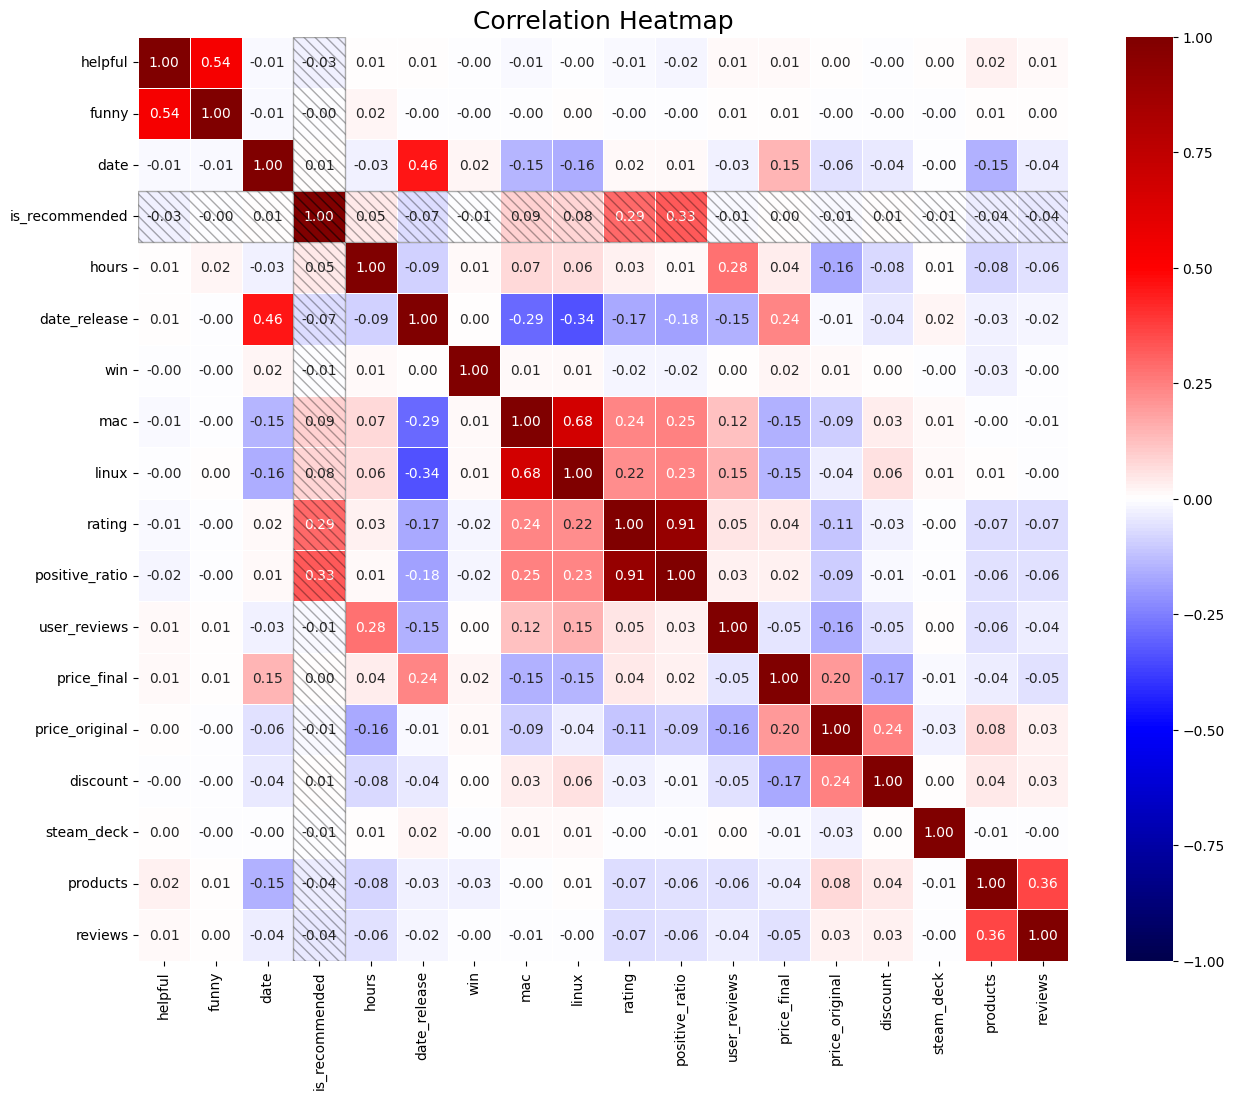

In [11]:
plt.figure(figsize=(15, 12))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='seismic', 
    fmt=".2f", 
    linewidths=0.5,
    vmin=-1,
    vmax=1,
#     mask=np.triu(np.ones_like(corr_matrix, dtype=bool)),
)

import matplotlib.patches as patches
# Highlight the specific column with a rectangle using dashed lines and reduced opacity
highlighted_column_index = corr_matrix.columns.get_loc("is_recommended")
rect_column = patches.Rectangle(
    (highlighted_column_index, 0), 1, len(corr_matrix), 
    linewidth=1, 
    edgecolor='black', 
    facecolor='none', 
    hatch='\\\\\\', 
    alpha=0.33, 
    zorder=3
)

# Highlight the specific row with a rectangle using dashed lines and reduced opacity
highlighted_row_index = corr_matrix.index.get_loc("is_recommended")
rect_row = patches.Rectangle(
    (0, highlighted_row_index), len(corr_matrix), 1, 
    linewidth=1, 
    edgecolor='black', 
    facecolor='none', 
    hatch='\\\\\\', 
    alpha=0.33, 
    zorder=3
)

plt.gca().add_patch(rect_column)
plt.gca().add_patch(rect_row)


plt.title('Correlation Heatmap', fontsize=18)
#plt.savefig("../data/2-plot/EDA-1-Correlation Heatmap.png")
plt.show()

# Investigate Features Correlated with the Outcome

In [12]:
# Define color palette for `is_recommended`
is_recommended_palette = {True: 'skyblue', False: 'salmon'}

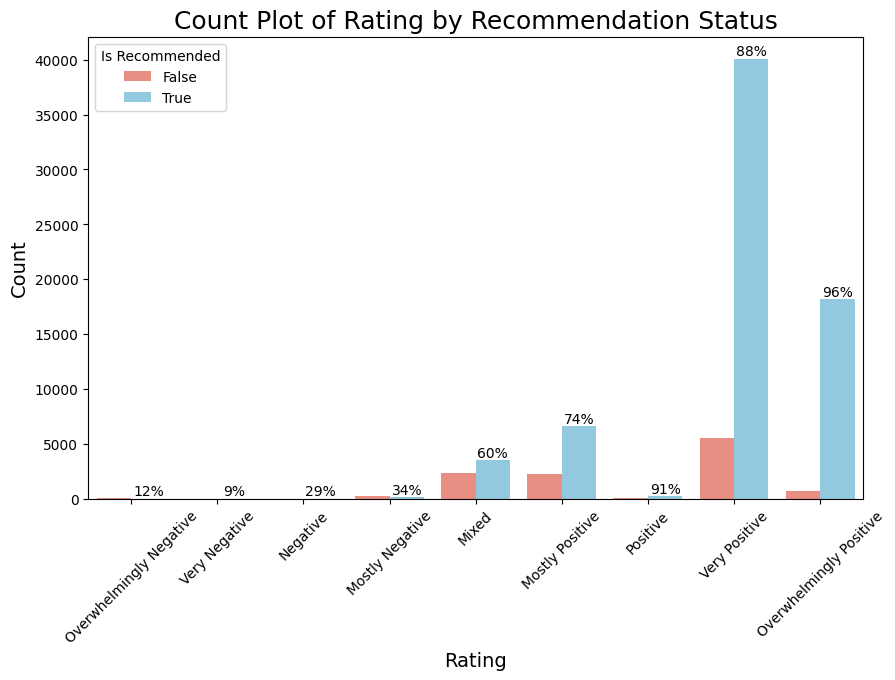

In [13]:
# Create count plot for rating
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    x='rating', 
    hue='is_recommended', 
    data=df_nontags, 
    palette=is_recommended_palette
)
plt.title('Count Plot of Rating by Recommendation Status', fontsize=18)
plt.xlabel('Rating', fontsize=14)
# Convert numerical ratings back to ordinal feature labels when plotting
plt.xticks(ticks=range(9), labels=[rating_order[rating] for rating in range(9)], rotation=45)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Is Recommended', loc='upper left')
# for p in ax.patches:
#     ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
#                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
#                 textcoords='offset points')
# [p.get_height() for p in ax.patches]
for i, p in enumerate(ax.patches[9:18]):
    false_height = ax.patches[i].get_height()
    true_height = p.get_height()
    percentage = (true_height/(false_height + true_height) * 100).round(2)
    ax.annotate(f'{percentage:.0f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                 textcoords='offset points')
#plt.savefig("../data/2-plot/EDA-2-Count Plot of Rating by Recommendation Status - rating.png")
plt.show()

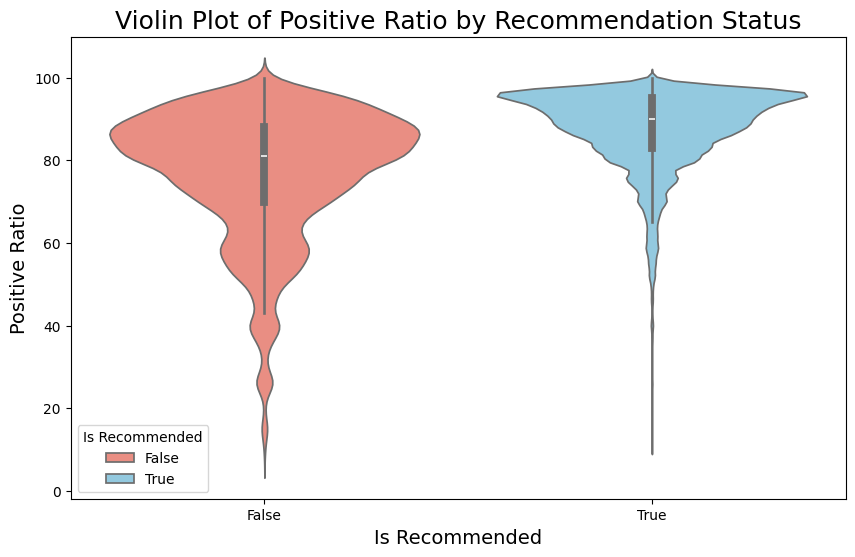

In [14]:
# Create violin plot for positive_ratio
plt.figure(figsize=(10, 6))
sns.violinplot(
    x='is_recommended', 
    y='positive_ratio', 
    hue='is_recommended',
    data=df_nontags, 
    palette=is_recommended_palette
)
plt.title('Violin Plot of Positive Ratio by Recommendation Status', fontsize=18)
plt.xlabel('Is Recommended', fontsize=14)
plt.ylabel('Positive Ratio', fontsize=14)
plt.legend(title='Is Recommended', loc='lower left')
#plt.savefig("../data/2-plot/EDA-2-Count Plot of Rating by Recommendation Status - positive_ratio.png")
plt.show()

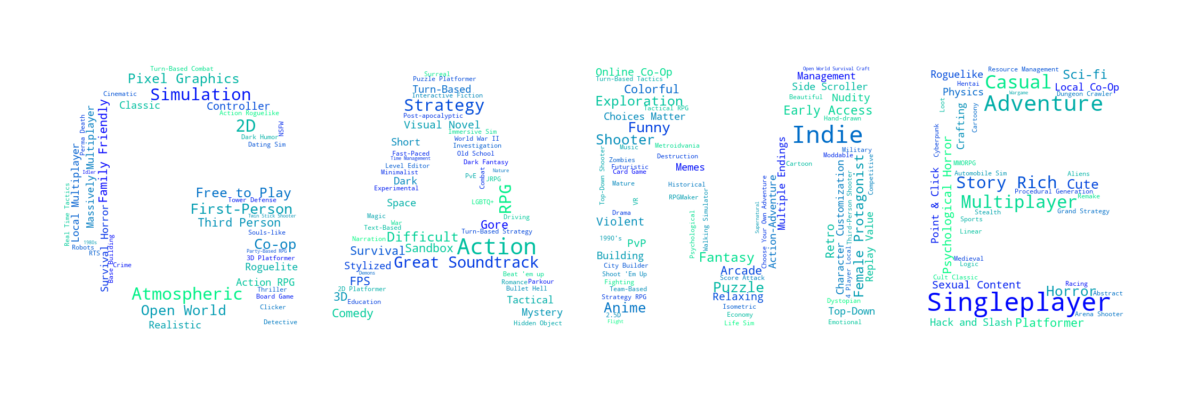

In [15]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud

steam_mask = np.array(Image.open('/Users/bagel/Desktop/Screenshot 2024-04-14 at 11.01.58 PM.png'))

tags_columns = [col for col in df.columns if col.startswith('tag_')]
tags_counts = df.drop_duplicates(subset=['app_id'])[tags_columns].sum()

tags_counts_dict = {tag.replace('tag_', ''): count for tag, count in tags_counts.items()}

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='winter', mask=steam_mask).generate_from_frequencies(tags_counts_dict)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.show()

In [16]:
tags_counts.sort_values().tail(15)

tag_Funny               1448
tag_Puzzle              1477
tag_Great Soundtrack    1689
tag_Story Rich          1990
tag_Simulation          2037
tag_RPG                 2040
tag_Strategy            2044
tag_Atmospheric         2186
tag_2D                  2232
tag_Multiplayer         2446
tag_Casual              2838
tag_Adventure           3973
tag_Action              4176
tag_Indie               4809
tag_Singleplayer        5378
dtype: int64

# Time-Series Analysis

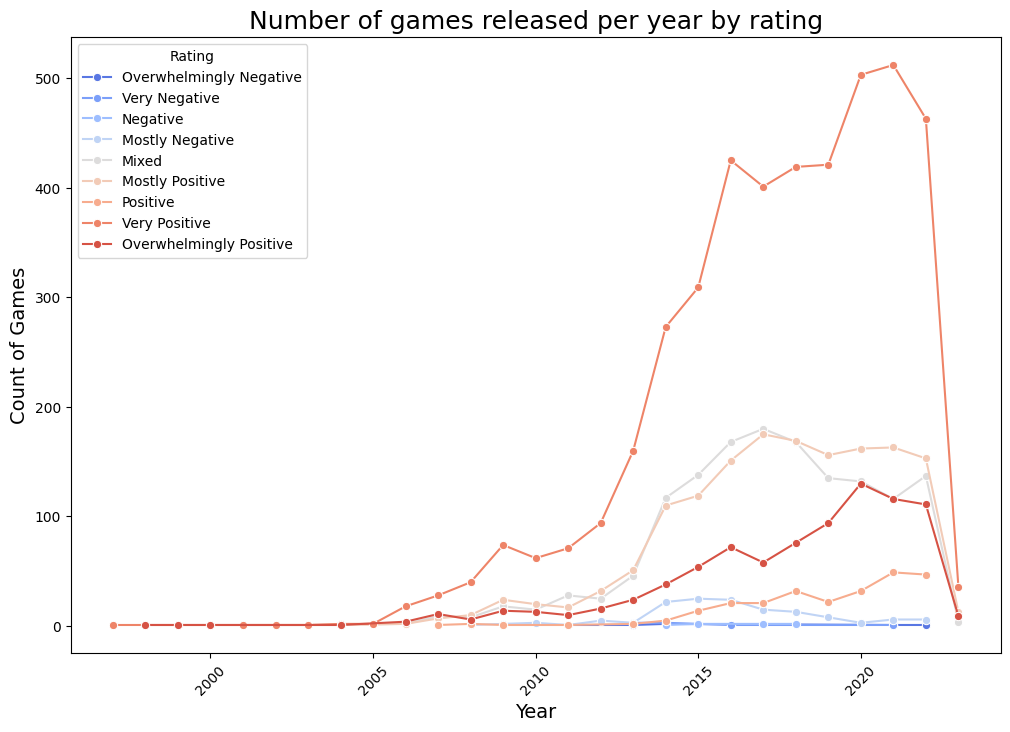

In [17]:
df = pd.read_csv("/Users/bagel/Downloads/1-recommendations_merged_100000_samples-train.csv.gz")

df['date_release'] = pd.to_datetime(df['date_release'], errors='coerce')
df['release_year'] = df['date_release'].dt.year
# df['rating'] = df['rating'].astype('category')

yearly_ratings = df.groupby(['release_year', 'rating'])['app_id'].nunique().reset_index(name='num_games')
yearly_ratings['rating'] = pd.Categorical(yearly_ratings['rating'], categories=rating_order, ordered=True)

#sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.lineplot(data=yearly_ratings, x='release_year', y='num_games', hue='rating', marker="o", palette='coolwarm')

plt.title('Number of games released per year by rating', fontsize=18)

plt.xlabel('Year', fontsize=14)
plt.ylabel('Count of Games', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Rating')
plt.show()